In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


# EDA and Data Preprocessing

### Analysing target variable

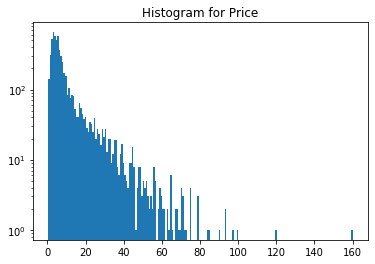

In [5]:
plt.title('Histogram for Price') 
plt.hist(train['Price'], bins=200, log=True)

plt.show()

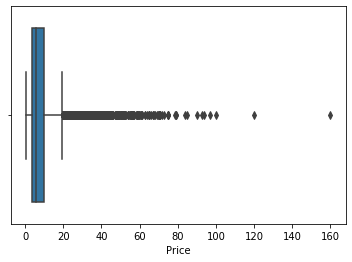

In [6]:
sns.boxplot(x=train['Price'])

> There is a **significant decrease** in the number of cars with increase in price

## Univariate Analysis

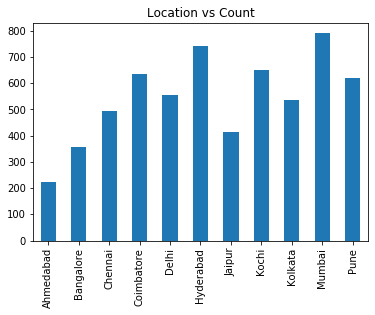

In [7]:
plt.title('Location vs Count')
train.Location.value_counts().sort_index().plot(kind ='bar')

>There are **least** number of cars in Ahemdabad<br>
>There are **maximum** number of cars in cities like in Mumbai and Hyderabad

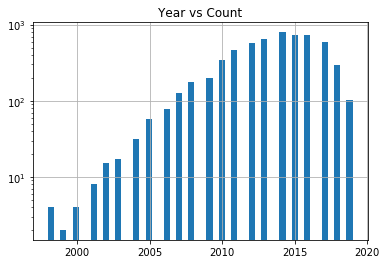

In [8]:
plt.title('Year vs Count')
train["Year"].hist(bins = 50, log = True)

>There is **very significant** increase in the number of cars produced with increasing year

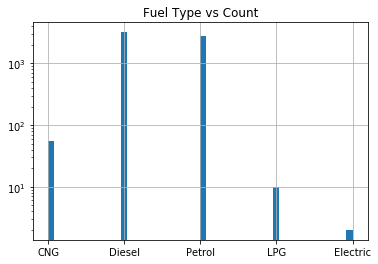

In [9]:
plt.title('Fuel Type vs Count')
train["Fuel_Type"].hist(bins = 50, log = True)

> There are **least** number of electric cars<br>
> There are **maximum** number of Petrol and Diesel cars

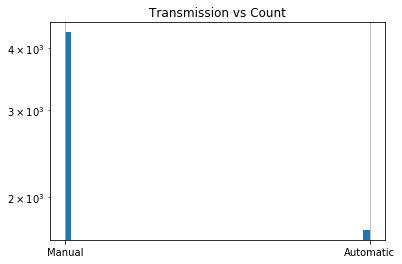

In [10]:
plt.title('Transmission vs Count')
train["Transmission"].hist(bins = 50, log = True)

> There are **very significant** number of manual cars over automatic cars

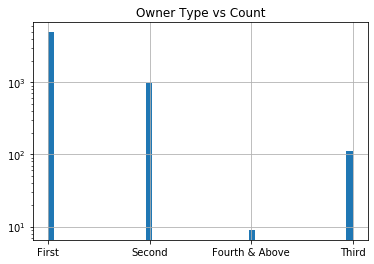

In [11]:
plt.title('Owner Type vs Count')
train["Owner_Type"].hist(bins = 50, log = True)

> There are **maximum** number of First owners<br>
> There are **minimum** number of Fourth & Above owners

>**Before proceeding to bivariate analysis we need to pre-process the data**

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [13]:
#creating a new feature named brand by taking the first word of 'Name' feature
train['Brand']=train['Name'].str.split().str[0]
test['Brand']=test['Name'].str.split().str[0]

In [14]:
train['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [15]:
#ISUZU and Isuzu exist.so replace it with Isuzu
train['Brand'].replace({'ISUZU':'Isuzu'},inplace=True)
test['Brand'].replace({'ISUZU':'Isuzu'},inplace=True)

In [16]:
#showing no.of distinct brands
train['Brand'].nunique()

30

In [17]:
train.drop(columns=['Name'],axis=1, inplace=True)
test.drop(columns=['Name'],axis=1, inplace=True)

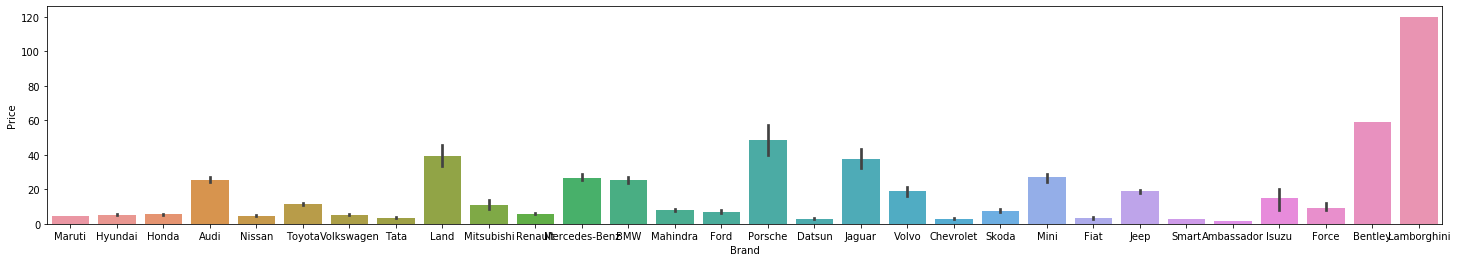

In [18]:
plt.figure(figsize=(25,4))
sns.barplot(x=train.Brand,y=train.Price,data=train)

In [19]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [20]:
train.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [21]:
test.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
Brand                 0
dtype: int64

In [22]:
train=train.drop_duplicates()

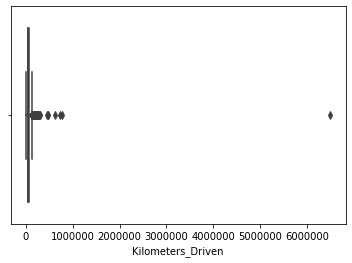

In [23]:
sns.boxplot(x=train['Kilometers_Driven'])

In [24]:
train.drop(train[train.Kilometers_Driven>=400000].index,inplace=True)

In [25]:
train.dtypes.value_counts()

object     8
float64    2
int64      2
dtype: int64

In [26]:
import datetime as dt
# The parameter required is the Amount of time the car is used than the year of manufacture.
train['Year'] = train['Year'].apply(lambda year: dt.datetime.now().year - year)
test['Year'] = test['Year'].apply(lambda year: dt.datetime.now().year - year)

In [27]:
train['Year']

0       10
1        5
2        9
3        8
4        7
        ..
6014     6
6015     5
6016     8
6017     7
6018     9
Name: Year, Length: 6010, dtype: int64

In [28]:
train['Mileage']=train['Mileage'].str.rstrip('kmplkm/kg').astype('float')
test['Mileage']=test['Mileage'].str.rstrip('kmplkm/kg').astype('float')

In [29]:
train['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6010, dtype: float64

In [30]:
train['Power']=train['Power'].str.rstrip('bhp')
train['Power']= pd.to_numeric(train['Power'],errors='coerce')
test['Power']=test['Power'].str.rstrip('bhp')
test['Power']= pd.to_numeric(test['Power'],errors='coerce')

In [31]:
train['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6010, dtype: float64

In [32]:
train['Engine']=train['Engine'].str.rstrip('CC').astype('float')
test['Engine']=test['Engine'].str.rstrip('CC').astype('float')

In [33]:
train['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6010, dtype: float64

In [34]:
nl=[]
for i in train['Power']:
    v=str(i).split()[0]
    if v=='null' or v=='0.0' or v=='0':
        nl.append(np.nan)
    else:
        nl.append(float(v))
train['Power']=nl

nl=[]
for i in test['Power']:
    v=str(i).split()[0]
    if v=='null' or v=='0.0' or v=='0':
        nl.append(np.nan)
    else:
        nl.append(float(v))
test['Power']=nl

In [35]:
nl=[]
for i in train.Seats:
    if i==0.0:
        nl.append(np.nan)
    else:
        nl.append(i)
train['Seats']=nl

nl=[]
for i in test.Seats:
    if i==0.0:
        nl.append(np.nan)
    else:
        nl.append(i)
test['Seats']=nl

In [36]:
train.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 43
Price                  0
Brand                  0
dtype: int64

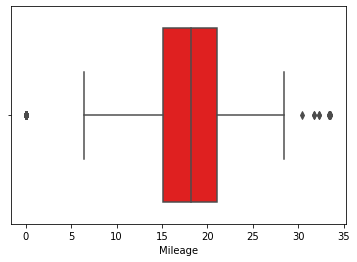

In [37]:
sns.boxplot(train["Mileage"],color="r")

In [38]:
Q1=train.Mileage.quantile(0.25)
Q3=train.Mileage.quantile(0.75)
g=train[(train.Mileage > Q1 - (1.5 * (Q3-Q1))) & (train.Mileage < Q3 + (1.5 * (Q3-Q1)))].Mileage.mean()
train['Mileage'].fillna(g,inplace=True)

Q1=test.Mileage.quantile(0.25)
Q3=test.Mileage.quantile(0.75)
g=test[(test.Mileage > Q1 - (1.5 * (Q3-Q1))) & (test.Mileage < Q3 + (1.5 * (Q3-Q1)))].Mileage.mean()
test['Mileage'].fillna(g,inplace=True)

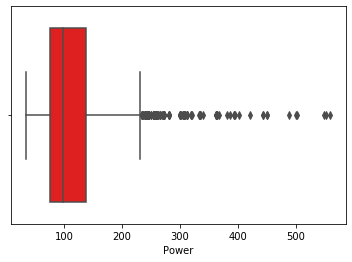

In [39]:
sns.boxplot(train["Power"],color="r")

In [40]:
Q1=train.Power.quantile(0.25)
Q3=train.Power.quantile(0.75)
g=train[(train.Power > Q1 - (1.5 * (Q3-Q1))) & (train.Power < Q3 + (1.5 * (Q3-Q1)))].Power.mean()
train['Power'].fillna(g,inplace=True)

Q1=test.Power.quantile(0.25)
Q3=test.Power.quantile(0.75)
g=test[(test.Power > Q1 - (1.5 * (Q3-Q1))) & (test.Power < Q3 + (1.5 * (Q3-Q1)))].Power.mean()
test['Power'].fillna(g,inplace=True)

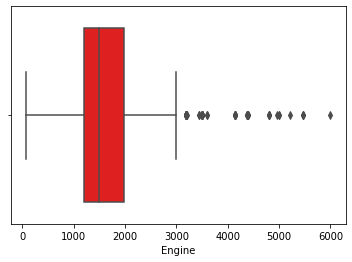

In [41]:
sns.boxplot(train["Engine"],color="r")

In [42]:
Q1=train.Engine.quantile(0.25)
Q3=train.Engine.quantile(0.75)
g=train[(train.Engine > Q1 - (1.5 * (Q3-Q1))) & (train.Engine < Q3 + (1.5 * (Q3-Q1)))].Engine.mean()
train['Engine'].fillna(g,inplace=True)

Q1=test.Engine.quantile(0.25)
Q3=test.Engine.quantile(0.75)
g=test[(test.Engine > Q1 - (1.5 * (Q3-Q1))) & (test.Engine < Q3 + (1.5 * (Q3-Q1)))].Engine.mean()
test['Engine'].fillna(g,inplace=True)

In [43]:
train['Seats'].fillna(train['Seats'].astype('float').median(), inplace = True)
test['Seats'].fillna(test['Seats'].astype('float').median(), inplace = True)

In [44]:
train.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

In [45]:
cols=['Year','Kilometers_Driven']
train[cols]=train[cols].astype(float)
test[cols]=test[cols].astype(float)

In [46]:
train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Brand'],
      dtype='object')

## Bivariate Analysis

### 1. Hue = Transmission

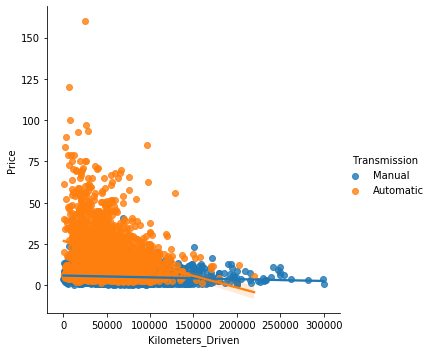

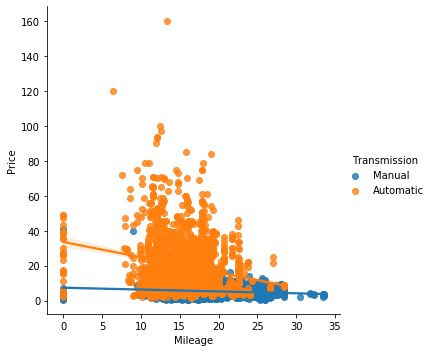

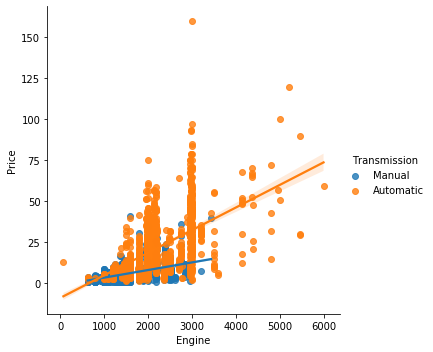

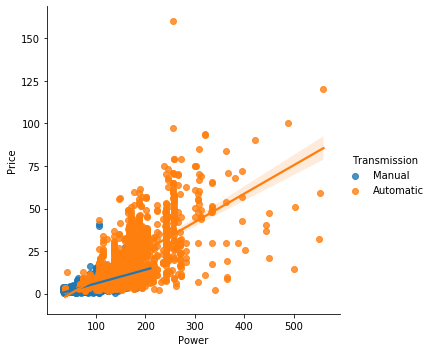

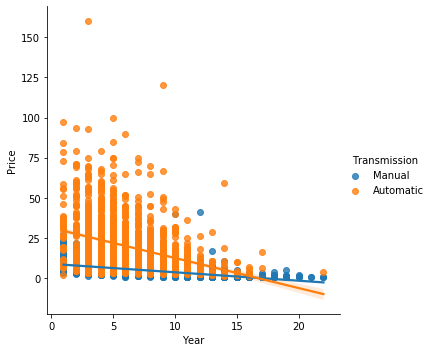

In [47]:
x_list = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Year']
for x in x_list:
    sns.lmplot(x=x, y='Price',hue='Transmission',data=train)
    plt.show()

> In **Automatic** cars **Kilometers Driven** is affecting the price as it has a **significant negative slope**.<br>
> In **Automatic** cars **Mileage** is affecting the price as it has a **significant negative slope**.<br>
> **significant** change is observed for **engine** variable with respect to price and transmission.<br>
> **significant** change is observed for **power** variable with respect to price and transmission.<br>
> As **recent years** are considered transmission has significant affect on price.<br>

### 2. Hue = Location

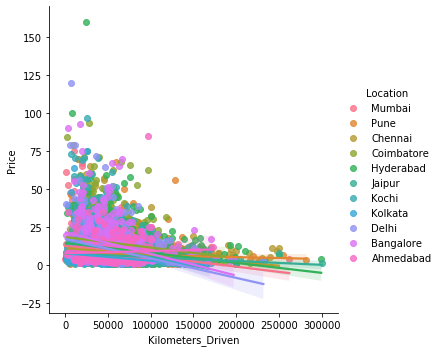

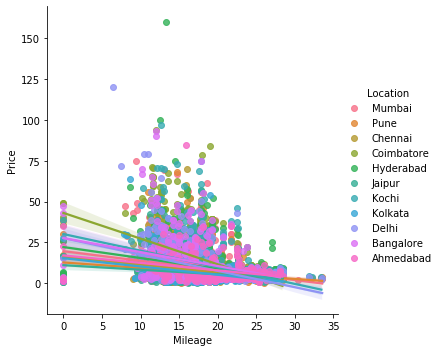

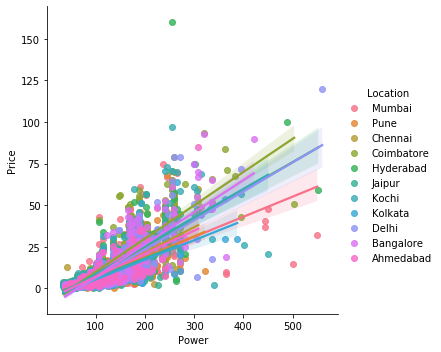

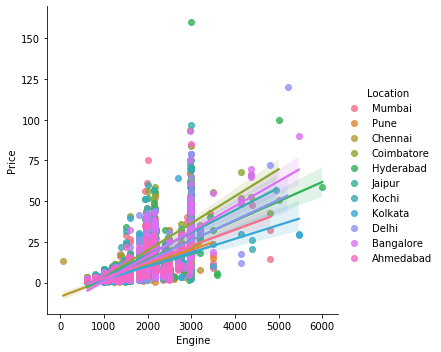

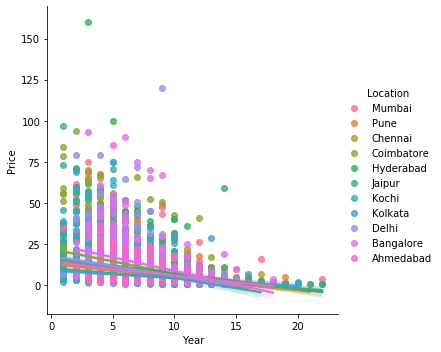

In [48]:
x_list = ['Kilometers_Driven', 'Mileage', 'Power', 'Engine', 'Year']
for x in x_list:
    sns.lmplot(x=x, y='Price', hue='Location', data=train)
    plt.show()

> Since lines are **not bundled** together and variation in slopes are much **significant** for various locations.

### 3. Hue = Fuel Type

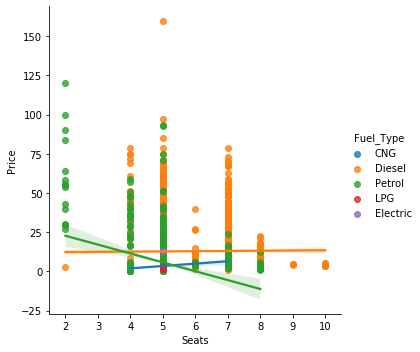

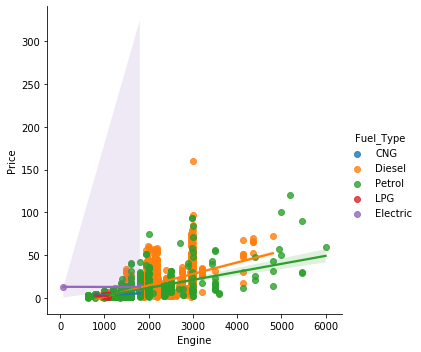

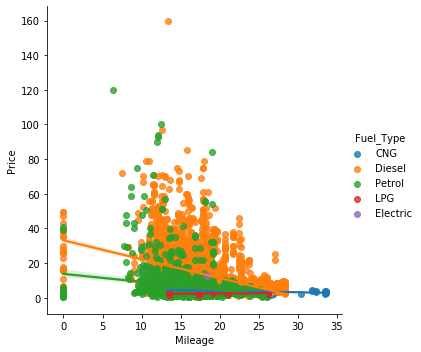

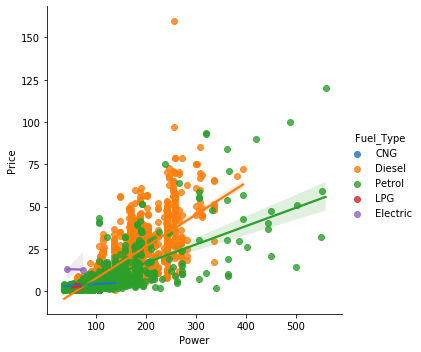

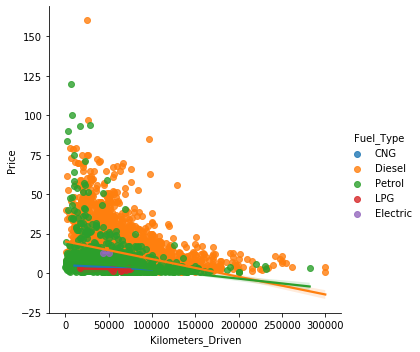

In [49]:
x_list = ['Seats', 'Engine', 'Mileage', 'Power', 'Kilometers_Driven']
for x in x_list:
    sns.lmplot(x=x, y='Price', hue='Fuel_Type',data=train)
    plt.show()

> Since lines are **not bundled** together and variation in slopes are much **significant** for various Fuel Types.

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6010 non-null   object 
 1   Year               6010 non-null   float64
 2   Kilometers_Driven  6010 non-null   float64
 3   Fuel_Type          6010 non-null   object 
 4   Transmission       6010 non-null   object 
 5   Owner_Type         6010 non-null   object 
 6   Mileage            6010 non-null   float64
 7   Engine             6010 non-null   float64
 8   Power              6010 non-null   float64
 9   Seats              6010 non-null   float64
 10  Price              6010 non-null   float64
 11  Brand              6010 non-null   object 
dtypes: float64(7), object(5)
memory usage: 610.4+ KB


In [51]:
train.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,0.501022,-0.321969,0.052460,-0.017575,-0.014801,-0.304942
Kilometers_Driven,0.501022,1.000000,-0.164504,0.174156,0.002741,0.243030,-0.184573
Mileage,-0.321969,-0.164504,1.000000,-0.588186,-0.502870,-0.302421,-0.306770
Engine,0.052460,0.174156,-0.588186,1.000000,0.859569,0.397511,0.656879
Power,-0.017575,0.002741,-0.502870,0.859569,1.000000,0.101596,0.768410
Seats,-0.014801,0.243030,-0.302421,0.397511,0.101596,1.000000,0.054046
Price,-0.304942,-0.184573,-0.306770,0.656879,0.768410,0.054046,1.000000


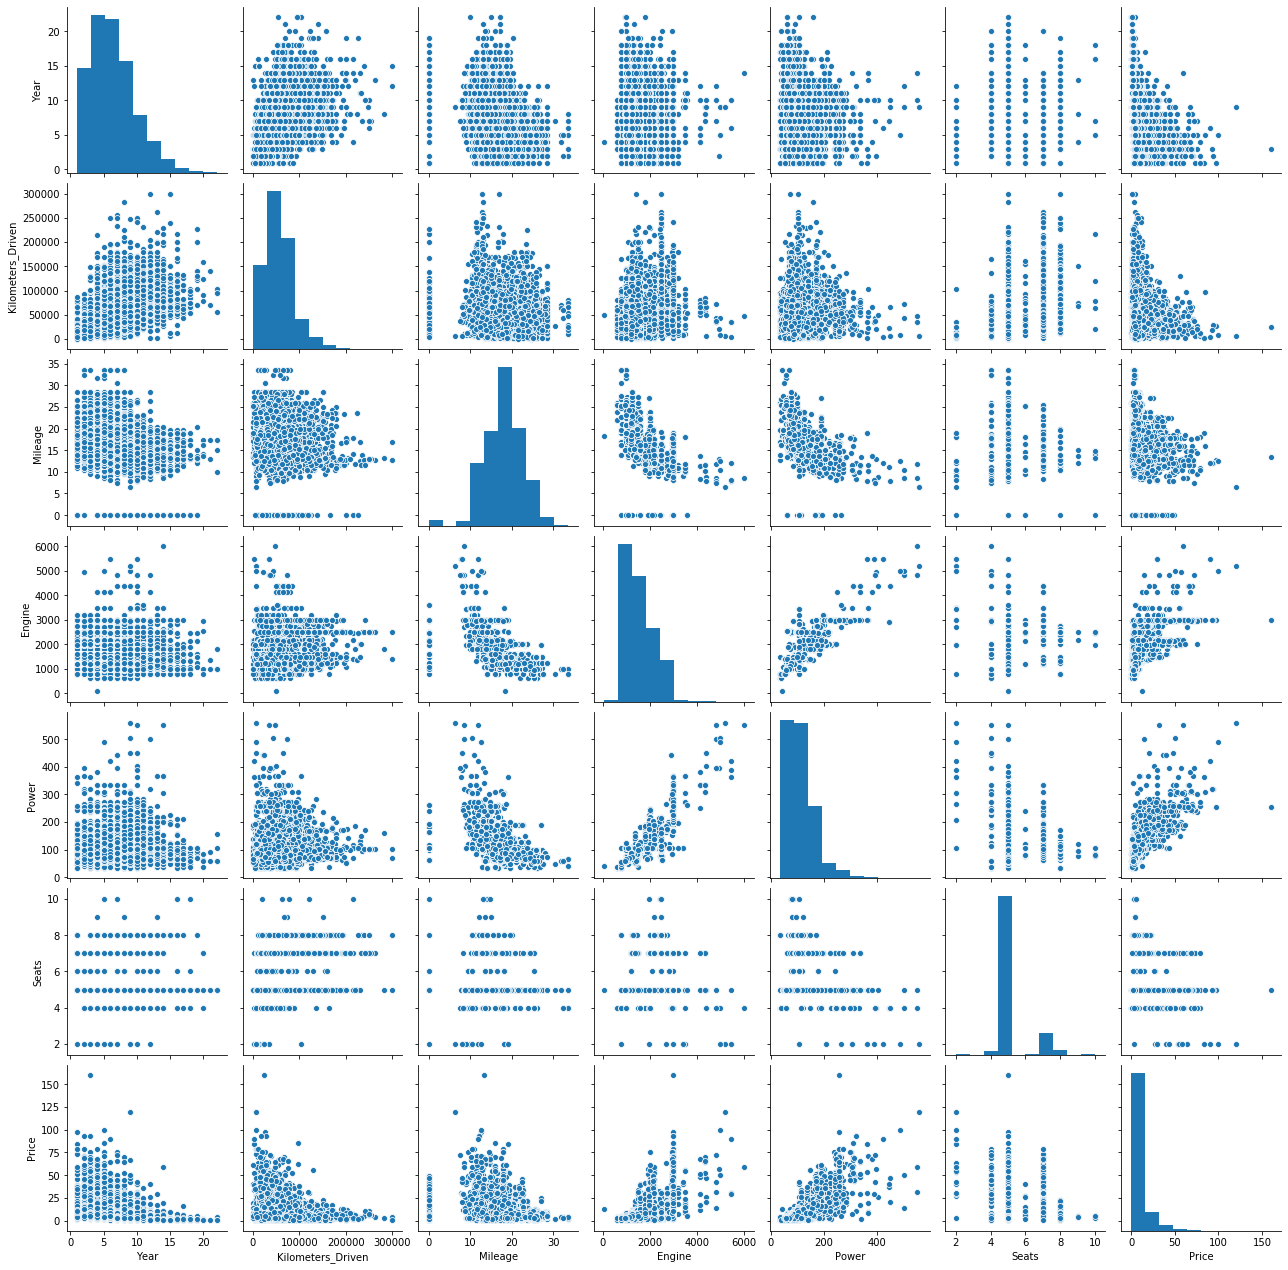

In [52]:
sns.pairplot(train)

>**Analysis:**
><ul>
    <li>Cars manufactured in recent years have a higher price</li>
    <li>Car Price reduces with increase in Kilometers Driven</li>
    <li>Power reduces with increase in Kilometers Driven</li>
    <li>Mileage is inversely proportional to Power and Engine</li>
    <li>Engine is proportional to Power</li>
 </ul>

In [53]:
train = pd.get_dummies(train,columns=['Location', 'Brand', 'Fuel_Type', 'Transmission', 'Owner_Type'],drop_first = True)
test = pd.get_dummies(test,columns=['Location', 'Brand', 'Fuel_Type', 'Transmission', 'Owner_Type'],drop_first = True)

In [54]:
train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,10.0,72000.0,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.0,41000.0,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,9.0,46000.0,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,8.0,87000.0,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,7.0,40670.0,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [55]:
train.shape

(6010, 54)

## Scaling

In [56]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [57]:
# As scaled dataset is required by specific models
df_scaled = train.copy()

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaling=MinMaxScaler()

In [60]:
df_scaled[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']]=scaling.fit_transform(df_scaled[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']])

In [61]:
df_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.428571,0.239567,0.793083,0.156261,0.045569,0.375,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.190476,0.136174,0.586464,0.254809,0.174971,0.375,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.380952,0.152850,0.542636,0.190179,0.103652,0.375,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0.333333,0.289595,0.619261,0.198448,0.103766,0.625,6.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0.285714,0.135074,0.453190,0.319946,0.202739,0.375,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Splitting data for Model training

In [62]:
col=train.pop('Price')
train['Price']=col
col=df_scaled.pop('Price')
df_scaled['Price']=col

In [63]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
X_sc = df_scaled.iloc[:,:-1].values
y_sc = df_scaled.iloc[:,-1].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(X_sc, y_sc, test_size=0.3, random_state=50)

# Model Training and Evaluation

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

## Linear Regression

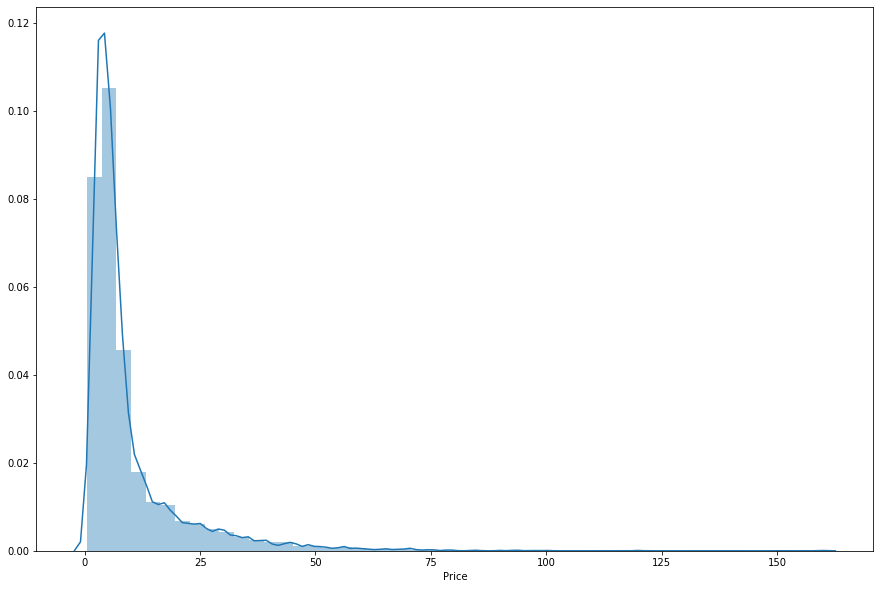

In [66]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(train['Price'])

In [67]:
multilinearreg=LinearRegression()

In [68]:
multilinearreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
multilinearreg.intercept_
print("The coefficient for linear regression is ",multilinearreg.intercept_) 

The coefficient for linear regression is  11.997585099603736


In [70]:
multilinearreg.coef_

array([-9.01998861e-01, -3.02614756e-05, -1.26054757e-01,  1.95453985e-03,
        7.83703634e-02, -7.44248698e-02,  1.60749378e+00,  1.27712078e+00,
        2.01892304e+00, -5.18450456e-01,  1.87286352e+00,  9.83278315e-01,
       -4.20840647e-01, -1.16613127e+00, -6.22039748e-01,  5.01731238e-01,
        2.68457745e+00,  1.33444258e+00,  6.70404929e+00, -6.77642950e+00,
       -7.98436797e+00, -6.86948337e+00, -8.71466409e+00, -6.04239090e+00,
       -7.02012475e+00, -6.33387015e+00, -8.25696697e+00,  9.71665231e+00,
       -5.95574914e+00,  6.38945589e+01,  1.58251939e+01, -8.53871512e+00,
       -5.23990307e+00,  4.57030835e+00,  7.68847441e+00, -5.21701365e+00,
       -6.42232262e+00,  1.22650417e+01, -7.09546171e+00, -6.84538715e+00,
       -7.30193683e-12, -7.55079971e+00, -4.46925596e+00, -6.94494754e+00,
       -2.40544557e+00,  3.96421642e-01,  1.07242311e+01,  6.14491834e-02,
       -1.09596330e+00,  2.50515524e-01,  3.05059148e+00, -4.54586660e-01,
        9.33730346e-01])

In [71]:
predicted_y=multilinearreg.predict(X_test)
print(predicted_y)

[ 2.11546331  9.6680426  34.21586315 ...  9.99020573  8.09541525
  6.02899713]


In [72]:
r2_lr = r2_score(y_test, predicted_y)*100
mse_lr = mean_squared_error(y_test, predicted_y)
rmse_lr = np.sqrt(mse_lr)

In [73]:
scores = [['R2 Score', r2_lr],
         ['Mean Squared Error', mse_lr],
         ['Root Mean Squared Error', rmse_lr]]
df = pd.DataFrame(scores, columns=['Metrics', 'Score'])
df

,Metrics,Score
0,R2 Score,79.434184
1,Mean Squared Error,25.073412
2,Root Mean Squared Error,5.007336


## Polynomial Regression

In [74]:
def create_polynomial_regression_model(degree):
    #Creates a polynomial regression model for the given degree

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on train data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    mse_train = mean_squared_error(y_train, y_train_predicted)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    mse_test = mean_squared_error(y_test, y_test_predict)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_predict)*100

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("MSE of training set is {}".format(mse_train))
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("MSE of test set is {}".format(mse_test))
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    scores = [['R2 Score', r2_test],
             ['Mean Squared Error', mse_test],
             ['Root Mean Squared Error', rmse_test]]
    df = pd.DataFrame(scores, columns=['Metrics', 'Score'])
    return df

In [75]:
df = create_polynomial_regression_model(2)
r2_test = df['Score'][0]
mse_test = df['Score'][1]
rmse_test = df['Score'][2]

The model performance for the training set
-------------------------------------------
MSE of training set is 6.651429968926227
RMSE of training set is 2.5790366358247465
R2 score of training set is 0.9472201509063821


The model performance for the test set
-------------------------------------------
MSE of test set is 19.441512383808906
RMSE of test set is 4.409253041480938
R2 score of test set is 84.05360424348525


## Ridge Regression

In [76]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_sc_train,y_sc_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [77]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-08}
-30.297448817499458


In [78]:
ridge_regressor = Ridge(ridge_regressor.best_params_['alpha'])
ridge_regressor.fit(X_sc_train, y_sc_train)
y_pred_ridge=ridge_regressor.predict(X_sc_test)

In [79]:
mse_rr = mean_squared_error(y_sc_test,y_pred_ridge)
rmse_rr = np.sqrt(mse_rr)
r2_rr = r2_score(y_sc_test,y_pred_ridge)*100
print('mse:', mse_rr)
print('r^2:', r2_rr)

mse: 25.073412450382637
r^2: 79.43418443962679


## Lasso Regression

In [80]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_sc_train,y_sc_train)
print(lasso_regressor.best_params_)

{'alpha': 1e-15}


In [81]:
lasso_regressor = Lasso(lasso_regressor.best_params_['alpha'])
lasso_regressor.fit(X_sc_train, y_sc_train)
y_pred_lasso=lasso_regressor.predict(X_sc_test)

In [82]:
mse_lsr = mean_squared_error(y_sc_test,y_pred_lasso)
rmse_lsr = np.sqrt(mse_lsr)
r2_lsr = r2_score(y_sc_test,y_pred_lasso)*100
print('mse:',mse_lsr)
print('r^2:',r2_lsr)

mse: 25.07285479128144
r^2: 79.43464184502558


## Support Vector Regression

In [83]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1,0.01, 'scale']}

In [84]:
grid = GridSearchCV(SVR(), param_grid, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
print(grid.best_params_)

{'C': 10, 'gamma': 'scale'}


In [86]:
regressor = SVR(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
regressor.fit(X_sc_train, y_sc_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
y_pred_svr=regressor.predict(X_sc_test)
y_pred_svr

array([ 2.64653138,  5.98867597, 36.56489459, ...,  7.79863846,
        6.59231111,  4.86799093])

In [88]:
mse_svr=mean_squared_error(y_sc_test, y_pred_svr)
print('mse =',mse_svr)
rmse_svr=np.sqrt(mse_svr)
print('rmse =', rmse_svr)

mse = 17.311612160848693
rmse = 4.160722552736327


In [89]:
r2_svr=r2_score(y_sc_test, y_pred_svr)*100
r2_svr

85.80059960098112

## Decision Tree Regression

In [90]:
# Set the parameters by cross-validation
tuned_parameters = [ {'max_depth': [None, 50, 100], 'min_samples_split': [5, 8, 10],
                     'min_samples_leaf': [1, 2, 3], 'max_features': [None, 'auto', 'sqrt', 'log2'], 
                     'max_leaf_nodes':[50, 100, 150]}]

In [91]:
clf = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,scoring='neg_mean_squared_error',cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [None, 50, 100],
                          'max_features': [None, 'auto', 'sqrt', 'log2'],
                         

In [92]:
print(clf.best_params_)

{'max_depth': 100, 'max_features': None, 'max_leaf_nodes': 150, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [93]:
regressor = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'],
                                  max_features=clf.best_params_['max_features'],
                                  max_leaf_nodes=clf.best_params_['max_leaf_nodes'],
                                  min_samples_leaf=clf.best_params_['min_samples_leaf'],
                                  min_samples_split=clf.best_params_['min_samples_split'])

In [94]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=150,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [95]:
y_pred = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test,y_pred)*100
print('mse:', mse_dt)
print('r^2:', r2_dt)

mse: 22.161845330238137
r^2: 81.82232177446431


## Random Forest Regression

In [96]:
class CustomRandomForest:
    
    def __init__(self):
        
        self.regressor = RandomForestRegressor()

    def tune_parameters(self, X_train, y_train):
        
        parameters = {'n_estimators': [100, 200, 250], 
                      'max_depth': [10, 15, 20],
                      'min_samples_leaf': [1, 2, 5]}
        
        regressor_ = GridSearchCV(self.regressor, parameters, cv=5, n_jobs=-1)
        regressor_.fit(X_train, y_train)
        
        self.best_parameters = regressor_.best_params_
        self.best_score = regressor_.best_score_
        
        print('Best parameters : {}'.format(self.best_parameters))
        print('Best score : {}'.format(self.best_score))
    
    def fit(self, X_train, y_train):
        
        self.regressor = RandomForestRegressor(n_estimators = self.best_parameters['n_estimators'],
                                               max_depth = self.best_parameters['max_depth'],
                                               min_samples_leaf = self.best_parameters['min_samples_leaf'])
        
        self.model = self.regressor.fit(X_train, y_train)
        
    def predict(self, X_test):
        
        y_pred = self.model.predict(X_test)
        return y_pred
    
    def evaluate(self, y_test, y_pred):
        
        r2_rf = r2_score(y_test, y_pred)*100
        mse_rf = mean_squared_error(y_test, y_pred)
        rmse_rf = np.sqrt(mse_rf)
        
        scores = [['R2 Score', r2_rf],
                  ['Mean Squared Error', mse_rf],
                  ['Root Mean Squared Error', rmse_rf]]
        df = pd.DataFrame(scores, columns=['Metrics', 'Score'])
        return df

In [97]:
regressor = CustomRandomForest()

### Hyperparameter tuning

In [98]:
regressor.tune_parameters(X_train, y_train)

Best parameters : {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}
Best score : 0.883149114329013


In [99]:
regressor.fit(X_train, y_train)

In [100]:
y_pred = regressor.predict(X_test)

In [101]:
df = regressor.evaluate(y_test, y_pred)
r2_rf = df['Score'][0]
mse_rf = df['Score'][1]
rmse_rf = df['Score'][2]
df

,Metrics,Score
0,R2 Score,91.216955
1,Mean Squared Error,10.708105
2,Root Mean Squared Error,3.272324


# Summary

In [102]:
models = [['Linear Regression', r2_lr, mse_lr, rmse_lr], 
          ['Polynomial Regression', r2_test, mse_test, rmse_test],
          ['Ridge Regression', r2_rr, mse_rr, rmse_rr],
          ['Lasso Regression', r2_lsr, mse_lsr, rmse_lsr],
          ['Support Vector Regression', r2_svr, mse_svr, rmse_svr],
          ['Decision Tree Regression', r2_dt, mse_dt, rmse_dt],
          ['Random Forest Regression', r2_rf, mse_rf, rmse_rf]]
df = pd.DataFrame(models, columns=['Model', 'R2_Score', 'MSE', 'RMSE'])
df

,Model,R2_Score,MSE,RMSE
0,Linear Regression,79.434184,25.073412,5.007336
1,Polynomial Regression,84.053604,19.441512,4.409253
2,Ridge Regression,79.434184,25.073412,5.007336
3,Lasso Regression,79.434642,25.072855,5.007280
4,Support Vector Regression,85.800600,17.311612,4.160723
5,Decision Tree Regression,81.822322,22.161845,4.707637
6,Random Forest Regression,91.216955,10.708105,3.272324


# Prediction on Test Data

In [103]:
temp = train.copy()
temp.drop('Price', axis=1, inplace=True)
a = list(temp.columns)
b = list(test.columns)
missing_test = np.setdiff1d(a,b)  #add in test

In [104]:
missing_train = np.setdiff1d(b,a) #add in train

In [105]:
for i in range(len(missing_test)):
    a = np.zeros((test.shape[0],), dtype=int)
    test.insert(train.columns.get_loc(missing_test[i]), missing_test[i], a)

In [106]:
for i in range(len(missing_train)):
    a = np.zeros((train.shape[0],), dtype=int)
    train.insert(test.columns.get_loc(missing_train[i]), missing_train[i], a)

In [107]:
missing_test

array(['Brand_Audi', 'Brand_Force', 'Brand_Lamborghini', 'Brand_Smart',
       'Fuel_Type_Electric'], dtype='<U25')

In [108]:
missing_train

array(['Brand_Hindustan', 'Brand_OpelCorsa'], dtype='<U25')

In [109]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values

In [110]:
regressor = CustomRandomForest()

In [111]:
regressor.tune_parameters(X,y)

Best parameters : {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 100}
Best score : 0.8849235186091707


In [112]:
regressor.fit(X,y)

In [113]:
predict = regressor.predict(test)

### Predicted Values:

In [114]:
prediction = pd.DataFrame(predict)

In [115]:
prediction.head(30) #First 30 predictions of Car Price

,0
0,3.248907
1,2.751528
2,17.396741
3,4.320433
4,4.662220
5,12.775376
6,21.226845
7,2.277312
8,3.872718
9,10.758419
